# PROJECT 2 - Houston Crime Data Exploration

Why Houston? - Houston has been my home for the last few years and I am very passionate about the city. The city has a lot to offer but like any other big city it isn't above crime, and as such you should reserve your judgement simply based on the exploration presented in this notebook. 
Anecdote: I actually red building at the bottom left corner of the tall tower (William's Tower). 

Why crime? - It was the most interetsing set of data in the list. We weren't too passionate about mulicipality reports or zoning and decide to explore crime. 

Having lived in Houston, I can tell you the areas to avoid - 3rd and 4th ward (the usual - south side). But let's explore this data and see what we find.

In [1]:
!wget https://raw.githubusercontent.com/bosea3000/Project-02/master/Houston.jpg

--2016-11-10 20:58:37--  https://raw.githubusercontent.com/bosea3000/Project-02/master/Houston.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128483 (125K) [image/jpeg]
Saving to: ‘Houston.jpg’

Houston.jpg         100%[=====================>] 125.47K  --.-KB/s   in 0.005s 

2016-11-10 20:58:37 (26.7 MB/s) - ‘Houston.jpg’ saved [128483/128483]



![](Houston.jpg)

# Part-1 (Examine the data) 

The csv file used here has been modified from the original source data available at: http://www.houstontx.gov/police/cs/index-2.htm

Modification Steps:
1. Download all availble (.xls) files for 2016 from the website and save it as file1, file2, ...., etc.
2. Open each individual file and save-as (.csv UTF-8)
       --> Alternatively, you could use in2csv command in the csvtoolkit package.
3. Combine the separate files into one - See code in the markdown below 
4. Once combined, we open the merged csv and filter out ALL the non-2016 values and DELETE. Don't forget to SAVE. 
       --> We are only interested in 2016 crime. The files somehow contained few data points from 1985,86..,etc.

*Now we have final file ready for export using the wget command 

- !csvcut file1.csv | head -1 > crimeData.csv (To get the header and put into a new file)
- !tail -n +2 -q file*.csv >> crimeData.csv (To get every row EXCEPT the header and append to the new file)

In [2]:
!wget https://raw.githubusercontent.com/bosea3000/Project-02/master/crimeData.csv

--2016-11-10 20:58:44--  https://raw.githubusercontent.com/bosea3000/Project-02/master/crimeData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6700493 (6.4M) [text/plain]
Saving to: ‘crimeData.csv’

crimeData.csv       100%[=====================>]   6.39M  --.-KB/s   in 0.09s  

2016-11-10 20:58:44 (74.7 MB/s) - ‘crimeData.csv’ saved [6700493/6700493]



### Basic exploration using csvkit

In [45]:
!wc -l crimeData.csv

86778 crimeData.csv


##### Let's look at the header line and see what we are dealing with

In [4]:
!csvcut crimeData.csv | head -1 | csvlook

|-------+------+--------------+------+---------+------------+------------+------+--------+------------------|
|  Date | Hour | Offense_Type | Beat | Premise | BlockRange | StreetName | Type | Suffix | Number_Offenses  |
|-------+------+--------------+------+---------+------------+------------+------+--------+------------------|


##### Essentially, the same function as the code above but more direct and tabular

In [5]:
!csvcut -n crimeData.csv

  1: Date
  2: Hour
  3: Offense_Type
  4: Beat
  5: Premise
  6: BlockRange
  7: StreetName
  8: Type
  9: Suffix
 10: Number_Offenses


##### Let's see what are the TYPES of crimes reported in this data set

In [51]:
!csvcut -c3 crimeData.csv | sort | uniq 

1
Aggravated Assault
Auto Theft
Burglary
Murder
Offense_Type
Rape
Robbery
Theft


##### We see 2 entries that are questionable: 
1. Offense_Type is the header  
2. "1"is probably a typo

##### This is to see which entry has only been recorded ONCE. 

In [52]:
!csvcut -c3 crimeData.csv | sort | uniq -u

Offense_Type


And it's the header

##### Let's now count each TYPE of crime in 2016. 

In [53]:
!csvcut -c3 crimeData.csv | sort | uniq -c | sort

  13134 Burglary
      1 Offense_Type
      2 1
    213 Murder
  48663 Theft
    692 Rape
   7273 Robbery
   7846 Aggravated Assault
   8954 Auto Theft


##### That's a LOT of crime!! ~50,000 Thefts and ~13,000 Burglaries in just 9 months alone! 

##### You can also use the 'grep' command to do a specific search. Here we search for murder and count the total number

In [9]:
!csvcut crimeData.csv | grep -o 'Murder'| wc -l 

213


##### The city of Houston has divided up the city into subdivision and each subdivision has a code associated with it, as shown below. 

In [10]:
!csvcut -c4 crimeData.csv | sort | uniq -d | sort | head -5

10H10
10H20
10H30
10H40
10H50


##### Let's explore the subdivisions column and see the top-5 crime hot-spots

In [11]:
!csvstat -c4 crimeData.csv

  4. Beat
	<class 'str'>
	Nulls: False
	Unique values: 118
	5 most frequent values:
		1A20:	2078
		12D10:	1844
		19G10:	1741
		6B60:	1629
		2A50:	1621
	Max length: 8

Row count: 86777


###### Let's also explore the distribution of the Number of Occurrances column

In [12]:
!csvcut -c10 crimeData.csv | sort | uniq -c

  85262 1
      1 10
      1 12/13/2016
      1 13/11/16
      1 14/10/16
      1 15/20/16
      1 16/21/16
      1 17/21/16
      1 18/24/16
      1 19/1/16
   1276 2
    163 3
     46 4
     14 5
      5 6
      1 7
      1 8
      1 Number_Offenses


##### Looks like we have some inconsistent data to deal with

### What about NULL values? 
We can explore more using csvstat

##### Dimension - Time

In [13]:
!csvstat -c1,2 crimeData.csv

  1. Date
	<class 'datetime.date'>
	Nulls: False
	Min: 2016-01-01
	Max: 2016-09-30
	Unique values: 274
	5 most frequent values:
		2016-05-18:	395
		2016-09-15:	392
		2016-06-21:	386
		2016-09-02:	385
		2016-04-15:	384
  2. Hour
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 23
	Sum: 1120472
	Mean: 12.91208499948143
	Median: 13
	Standard Deviation: 5.918297313260744
	Unique values: 24
	5 most frequent values:
		15:	5407
		16:	5257
		14:	5093
		13:	4930
		11:	4867

Row count: 86777


##### Dimension - Offense

In [14]:
!csvstat -c3 crimeData.csv

  3. Offense_Type
	<class 'str'>
	Nulls: False
	Unique values: 8
	5 most frequent values:
		Theft:	48663
		Burglary:	13134
		Auto Theft:	8954
		Aggravated Assault:	7846
		Robbery:	7273
	Max length: 18

Row count: 86777


##### Dimension - Location

In [15]:
!csvstat -c4,5,6,7,8,9 crimeData.csv

  4. Beat
	<class 'str'>
	Nulls: False
	Unique values: 118
	5 most frequent values:
		1A20:	2078
		12D10:	1844
		19G10:	1741
		6B60:	1629
		2A50:	1621
	Max length: 8
  5. Premise
	<class 'str'>
	Nulls: True
	Unique values: 125
	5 most frequent values:
		Residence or House:	11946
		Apartment Parking Lot:	9962
		Road, Street, or Sidewalk:	9084
		Apartment:	8319
		Restaurant or Cafeteria Parking Lot:	3927
	Max length: 42
  6. BlockRange
	<class 'str'>
	Nulls: False
	Unique values: 233
	5 most frequent values:
		100-199:	1193
		2300-2399:	1178
		900-999:	1101
		800-899:	1066
		300-399:	1055
	Max length: 13
  7. StreetName
	<class 'str'>
	Nulls: False
	Unique values: 6888
	5 most frequent values:
		WESTHEIMER:	2660
		GULF:	1321
		SAM HOUSTON:	1309
		RICHMOND:	1238
		KATY:	1225
	Max length: 31
  8. Type
	<class 'str'>
	Nulls: False
	Unique values: 27
	5 most frequent values:
		-:	19541
		DR:	18333
		ST:	15181
		RD:	13160
		FWY:	6264
	Max length: 4
  9. Suffix
	<class 'str'>
	Nulls: False
	Va

##### Dimension - Measure of Offenses

In [16]:
!csvstat -c10 crimeData.csv

 10. Number_Offenses
	<class 'str'>
	Nulls: False
	Unique values: 17
	5 most frequent values:
		1:	85262
		2:	1276
		3:	163
		4:	46
		5:	14
	Max length: 10

Row count: 86777


### Questions?
1. What type of crime is most frequent in 2016?
2. What areas are affected the most?
3. What is the trend of total crime each month in 2016?
4. What time of day (in hour) do we see spikes in crime? 
5. What's the worst street to be on a holiday - (Let's say 4th of July)?

# Part 2 - (Setting Database and SQL Queries)

In [17]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [18]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [19]:
!createdb -U dbuser Project

In [20]:
%sql postgresql://dbuser@localhost:5432/Project

'Connected: dbuser@Project'

### Creating the Table - Crime

In [27]:
%%sql
DROP TABLE IF EXISTS Crime;
CREATE TABLE Crime (
    Date TIMESTAMP(0),
    Hour CHAR(4),
    Offense_Type VARCHAR(42),
    Beat VARCHAR(20),
    Premise VARCHAR(64),
    BlockRange VARCHAR(20),
    StreetName VARCHAR(64),
    Type VARCHAR(16),
    Suffix VARCHAR(12),
    Number_offenses VARCHAR(16)
    
);

Done.
Done.


[]

##### Loading our final (.csv) file into the database

In [30]:
%%sql
COPY Crime 
FROM '/home/jovyan/work/crimeData.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

86777 rows affected.


[]

##### Sanity check?!

In [32]:
%%sql 
SELECT COUNT(*) 
FROM Crime;

1 rows affected.


count
86777


##### Phew! We passed!

### Time for some Queries

##### Question 1
##### Notice the Query below. We asked the same question in part 1 using the csvtoolkit but having a visual aid really transforms the perception of the data in question. The most common cirme is - Theft. 

In [55]:
%%sql
SELECT DISTINCT OFFENSE_TYPE, COUNT(*)
FROM Crime
GROUP BY OFFENSE_TYPE
ORDER BY COUNT(*)

8 rows affected.


offense_type,count
1,2
Murder,213
Rape,692
Robbery,7273
Aggravated Assault,7846
Auto Theft,8954
Burglary,13134
Theft,48663


<Container object of 8 artists>

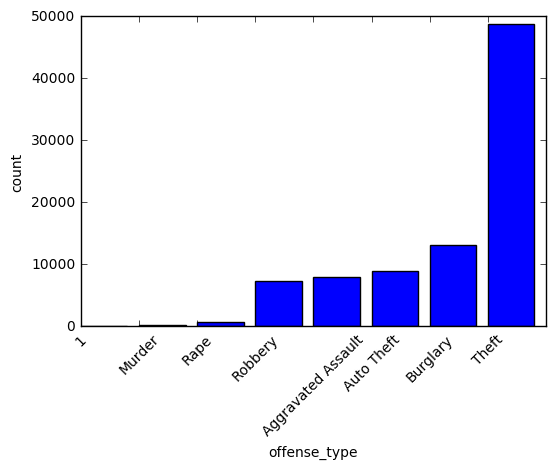

In [56]:
import matplotlib
%matplotlib inline 

q1_results = _
q1_results.bar()

##### I added the csv command below for a quick comparison 

In [57]:
!csvcut -c3 crimeData.csv | sort | uniq -c | sort

  13134 Burglary
      1 Offense_Type
      2 1
    213 Murder
  48663 Theft
    692 Rape
   7273 Robbery
   7846 Aggravated Assault
   8954 Auto Theft
